In [26]:
import os
import warnings
warnings.filterwarnings(action='ignore')
from glob import glob
import numpy as np
import PIL
from PIL import Image
import cv2
import dlib
from segment import *

In [27]:
path = './testeyebrow/'

training_images = []
training_labels = []

for img in glob(path + './*.png'):
    image = cv2.imread(img, cv2.IMREAD_COLOR)
    an_img = Image.fromarray(image)
    img_array = np.array(an_img)
    training_images.append(img_array)
    label = img.split('\\')[-1]
    training_labels.append(label)
    
training_images = np.array(training_images)
training_labels = np.array(training_labels)

### 눈썹 이미지 13개 라벨링(숫자)

from sklearn.preprocessing import LabelEncoder
# Label = 0 ~ 3
le = LabelEncoder()
training_labels = le.fit_transform(training_labels)
training_labels = training_labels.reshape(-1, 1)

print(training_images.shape)
print(training_labels.shape)

(4, 64, 64, 3)
(4, 1)


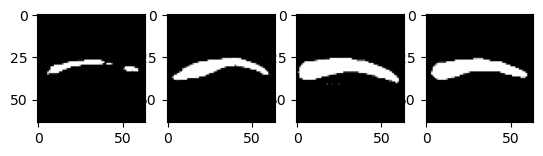

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

## 4개 헤어 이미지 출력
for i in range(training_images.shape[0]):
    plt.subplot(1, training_images.shape[0], i+1)
    plt.imshow(training_images[i])
plt.show()

In [35]:
## 라벨과 헤어 이름 맞추기
label_num = list(range(training_images.shape[0]))
label_name = le.inverse_transform(label_num)

for i in range(4):
    print(label_num[i], label_name[i])

0 0.png
1 1.png
2 2.png
3 3.png


In [37]:
training_labels = tf.one_hot(training_labels, training_images.shape[0])
training_labels = np.array(training_labels)
training_labels = training_labels.reshape(-1, training_images.shape[0])

In [38]:
X_train = training_images
y_train = training_labels

In [39]:
X_train.shape

(4, 64, 64, 3)

In [40]:
X_train = X_train / 255.0

In [42]:
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import *

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(216, activation='relu'))

model.add(Dense(training_images.shape[0], activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 128)       

In [44]:
data = model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 397ms/step - loss: 1.3990 - accuracy: 0.2500
Epoch 2/1000
1/1 [==============================] - 0s 13ms/step - loss: 1.2173 - accuracy: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 14ms/step - loss: 1.4917 - accuracy: 0.5000
Epoch 4/1000
1/1 [==============================] - 0s 13ms/step - loss: 1.1256 - accuracy: 0.5000
Epoch 5/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.7412 - accuracy: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.4237 - accuracy: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 13ms/step - loss: 1.1800 - accuracy: 0.5000
Epoch 8/1000
1/1 [==============================] - 0s 19ms/step - loss: 1.1770 - accuracy: 0.7500
Epoch 9/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.5214 - accuracy: 0.7500
Epoch 10/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.2857 - accuracy: 1.0000
Epoch 11

1/1 [==============================] - 0s 13ms/step - loss: 1.5527e-05 - accuracy: 1.0000
Epoch 160/1000
1/1 [==============================] - 0s 13ms/step - loss: 1.5318e-05 - accuracy: 1.0000
Epoch 161/1000
1/1 [==============================] - 0s 13ms/step - loss: 1.5050e-05 - accuracy: 1.0000
Epoch 162/1000
1/1 [==============================] - 0s 13ms/step - loss: 1.4782e-05 - accuracy: 1.0000
Epoch 163/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.4603e-05 - accuracy: 1.0000
Epoch 164/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.4335e-05 - accuracy: 1.0000
Epoch 165/1000
1/1 [==============================] - 0s 17ms/step - loss: 1.4096e-05 - accuracy: 1.0000
Epoch 166/1000
1/1 [==============================] - 0s 13ms/step - loss: 1.3918e-05 - accuracy: 1.0000
Epoch 167/1000
1/1 [==============================] - 0s 13ms/step - loss: 1.3709e-05 - accuracy: 1.0000
Epoch 168/1000
1/1 [==============================] - 0s 13ms/step - l

1/1 [==============================] - 0s 13ms/step - loss: 4.0829e-06 - accuracy: 1.0000
Epoch 316/1000
1/1 [==============================] - 0s 13ms/step - loss: 4.0233e-06 - accuracy: 1.0000
Epoch 317/1000
1/1 [==============================] - 0s 13ms/step - loss: 4.0233e-06 - accuracy: 1.0000
Epoch 318/1000
1/1 [==============================] - 0s 12ms/step - loss: 3.9935e-06 - accuracy: 1.0000
Epoch 319/1000
1/1 [==============================] - 0s 11ms/step - loss: 3.9637e-06 - accuracy: 1.0000
Epoch 320/1000
1/1 [==============================] - 0s 12ms/step - loss: 3.9041e-06 - accuracy: 1.0000
Epoch 321/1000
1/1 [==============================] - 0s 12ms/step - loss: 3.9041e-06 - accuracy: 1.0000
Epoch 322/1000
1/1 [==============================] - 0s 12ms/step - loss: 3.9041e-06 - accuracy: 1.0000
Epoch 323/1000
1/1 [==============================] - 0s 12ms/step - loss: 3.8743e-06 - accuracy: 1.0000
Epoch 324/1000
1/1 [==============================] - 0s 12ms/step - l

1/1 [==============================] - 0s 13ms/step - loss: 2.2054e-06 - accuracy: 1.0000
Epoch 472/1000
1/1 [==============================] - 0s 12ms/step - loss: 2.2054e-06 - accuracy: 1.0000
Epoch 473/1000
1/1 [==============================] - 0s 12ms/step - loss: 2.2054e-06 - accuracy: 1.0000
Epoch 474/1000
1/1 [==============================] - 0s 12ms/step - loss: 2.2054e-06 - accuracy: 1.0000
Epoch 475/1000
1/1 [==============================] - 0s 13ms/step - loss: 2.2054e-06 - accuracy: 1.0000
Epoch 476/1000
1/1 [==============================] - 0s 12ms/step - loss: 2.2054e-06 - accuracy: 1.0000
Epoch 477/1000
1/1 [==============================] - 0s 12ms/step - loss: 2.2054e-06 - accuracy: 1.0000
Epoch 478/1000
1/1 [==============================] - 0s 13ms/step - loss: 2.2054e-06 - accuracy: 1.0000
Epoch 479/1000
1/1 [==============================] - 0s 13ms/step - loss: 2.1756e-06 - accuracy: 1.0000
Epoch 480/1000
1/1 [==============================] - 0s 13ms/step - l

1/1 [==============================] - 0s 13ms/step - loss: 1.5497e-06 - accuracy: 1.0000
Epoch 628/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.5497e-06 - accuracy: 1.0000
Epoch 629/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.4901e-06 - accuracy: 1.0000
Epoch 630/1000
1/1 [==============================] - 0s 13ms/step - loss: 1.4901e-06 - accuracy: 1.0000
Epoch 631/1000
1/1 [==============================] - 0s 13ms/step - loss: 1.4901e-06 - accuracy: 1.0000
Epoch 632/1000
1/1 [==============================] - 0s 13ms/step - loss: 1.4901e-06 - accuracy: 1.0000
Epoch 633/1000
1/1 [==============================] - 0s 13ms/step - loss: 1.4603e-06 - accuracy: 1.0000
Epoch 634/1000
1/1 [==============================] - 0s 13ms/step - loss: 1.4603e-06 - accuracy: 1.0000
Epoch 635/1000
1/1 [==============================] - 0s 13ms/step - loss: 1.4603e-06 - accuracy: 1.0000
Epoch 636/1000
1/1 [==============================] - 0s 13ms/step - l

1/1 [==============================] - 0s 12ms/step - loss: 1.1623e-06 - accuracy: 1.0000
Epoch 784/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.1623e-06 - accuracy: 1.0000
Epoch 785/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.1623e-06 - accuracy: 1.0000
Epoch 786/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.1623e-06 - accuracy: 1.0000
Epoch 787/1000
1/1 [==============================] - 0s 11ms/step - loss: 1.1325e-06 - accuracy: 1.0000
Epoch 788/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.1325e-06 - accuracy: 1.0000
Epoch 789/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.1325e-06 - accuracy: 1.0000
Epoch 790/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.1325e-06 - accuracy: 1.0000
Epoch 791/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.1325e-06 - accuracy: 1.0000
Epoch 792/1000
1/1 [==============================] - 0s 12ms/step - l

1/1 [==============================] - 0s 13ms/step - loss: 8.9407e-07 - accuracy: 1.0000
Epoch 940/1000
1/1 [==============================] - 0s 13ms/step - loss: 8.9407e-07 - accuracy: 1.0000
Epoch 941/1000
1/1 [==============================] - 0s 13ms/step - loss: 8.9407e-07 - accuracy: 1.0000
Epoch 942/1000
1/1 [==============================] - 0s 13ms/step - loss: 8.6427e-07 - accuracy: 1.0000
Epoch 943/1000
1/1 [==============================] - 0s 12ms/step - loss: 8.6427e-07 - accuracy: 1.0000
Epoch 944/1000
1/1 [==============================] - 0s 12ms/step - loss: 8.6427e-07 - accuracy: 1.0000
Epoch 945/1000
1/1 [==============================] - 0s 12ms/step - loss: 8.6427e-07 - accuracy: 1.0000
Epoch 946/1000
1/1 [==============================] - 0s 13ms/step - loss: 8.6427e-07 - accuracy: 1.0000
Epoch 947/1000
1/1 [==============================] - 0s 12ms/step - loss: 8.6427e-07 - accuracy: 1.0000
Epoch 948/1000
1/1 [==============================] - 0s 12ms/step - l

In [21]:
path = './testimg/brow4.jpg'

test_img = eyebrow(path)

In [25]:
cv2.imshow("padding", test_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
test_image = []
test_image.append(test_img)
test_image = np.array(test_image) / 255.0

In [24]:
pred = model.predict(test_image)

pred = np.argmax(pred)
pred

1/1 [==============================] - 0s 12ms/step


3

In [45]:
model.save('./eyebrow_classify.h5')